In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import os

os.environ["TFHUB_CACHE_DIR"] = "_cache"

model = hub.load("https://tfhub.dev/google/spice/2")
model
# model.signatures["serving_default"]


In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import os

model = tf.saved_model.load("model")

print(model.signatures)

evaluate_pitch = model.signatures["serving_default"]
evaluate_pitch

from scipy.io import wavfile
sample_rate, audio_samples = wavfile.read("../../data/hello-hello.wav", 'rb')
print(f"sample_rate: {sample_rate}")

print(f"audio_samples: {audio_samples}")
print(f"len(audio_samples): {len(audio_samples)}")

slice_of_samples = audio_samples[:128]
print(f"slice_of_samples: {slice_of_samples}")
print(f"len(slice_of_samples): {len(slice_of_samples)}")

predictions = evaluate_pitch(tf.constant(slice_of_samples, tf.float32))
print(f"predictions: {predictions}")


2023-03-12 14:08:56.778951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 14:08:57.210787: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


2023-03-12 14:09:00.706786: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-12 14:09:00.706844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (elijahpc): /proc/driver/nvidia/version does not exist
2023-03-12 14:09:00.707162: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


_SignatureMap({'serving_default': <ConcreteFunction pruned(input) at 0x7F06444C1F90>})
sample_rate: 16000
audio_samples: [       0        0        0 ... 25349085 24946764 21063558]
len(audio_samples): 55680
slice_of_samples: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
len(slice_of_samples): 128
predictions: {'pitch': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.4608207], dtype=float32)>, 'uncertainty': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.91381407], dtype=float32)>}


In [4]:
import numpy as np
import requests
from scipy.io import wavfile

sample_rate, audio_samples = wavfile.read("../../data/hello-hello.wav", 'rb')
print(f"sample_rate: {sample_rate}")

input = {
  "instances": np.asarray(audio_samples).tolist()
}
print(f"input: {input}")

import json
with open('../../data/ts-hello.json', 'w') as f:
    json.dump(input, f)

# endpoint = "http://localhost:8501/v1/models/pitcheval:predict"
# endpoint = "http://localhost:8501/v1/models/model:predict"
endpoint = "http://localhost:8501/v1/models/model:predict"
response = requests.post(endpoint, json=input)

print(response.status_code)
print(response.json())


sample_rate: 16000
input: {'instances': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

sample_rate: 16000
len(audio_samples): 55680
len(pitch_outputs): 109
len(confidence_outputs): 109
duration: 3.48
actual ration: 510.8256880733945
ratio_offset: 0.015625
time_offset: 0.032
original_time_stamps: [0.0, 0.032, 0.064, 0.096, 0.128, 0.16, 0.192, 0.224, 0.256, 0.28800000000000003, 0.32, 0.352, 0.384, 0.41600000000000004, 0.448, 0.48, 0.512, 0.544, 0.5760000000000001, 0.608, 0.64, 0.672, 0.704, 0.736, 0.768, 0.8, 0.8320000000000001, 0.864, 0.896, 0.928, 0.96, 0.992, 1.024, 1.056, 1.088, 1.12, 1.1520000000000001, 1.184, 1.216, 1.248, 1.28, 1.312, 1.344, 1.3760000000000001, 1.408, 1.44, 1.472, 1.504, 1.536, 1.568, 1.6, 1.6320000000000001, 1.6640000000000001, 1.696, 1.728, 1.76, 1.792, 1.824, 1.856, 1.8880000000000001, 1.92, 1.952, 1.984, 2.016, 2.048, 2.08, 2.112, 2.144, 2.176, 2.208, 2.24, 2.2720000000000002, 2.3040000000000003, 2.336, 2.368, 2.4, 2.432, 2.464, 2.496, 2.528, 2.56, 2.592, 2.624, 2.656, 2.688, 2.72, 2.7520000000000002, 2.7840000000000003, 2.816, 2.848, 2.88, 2.91

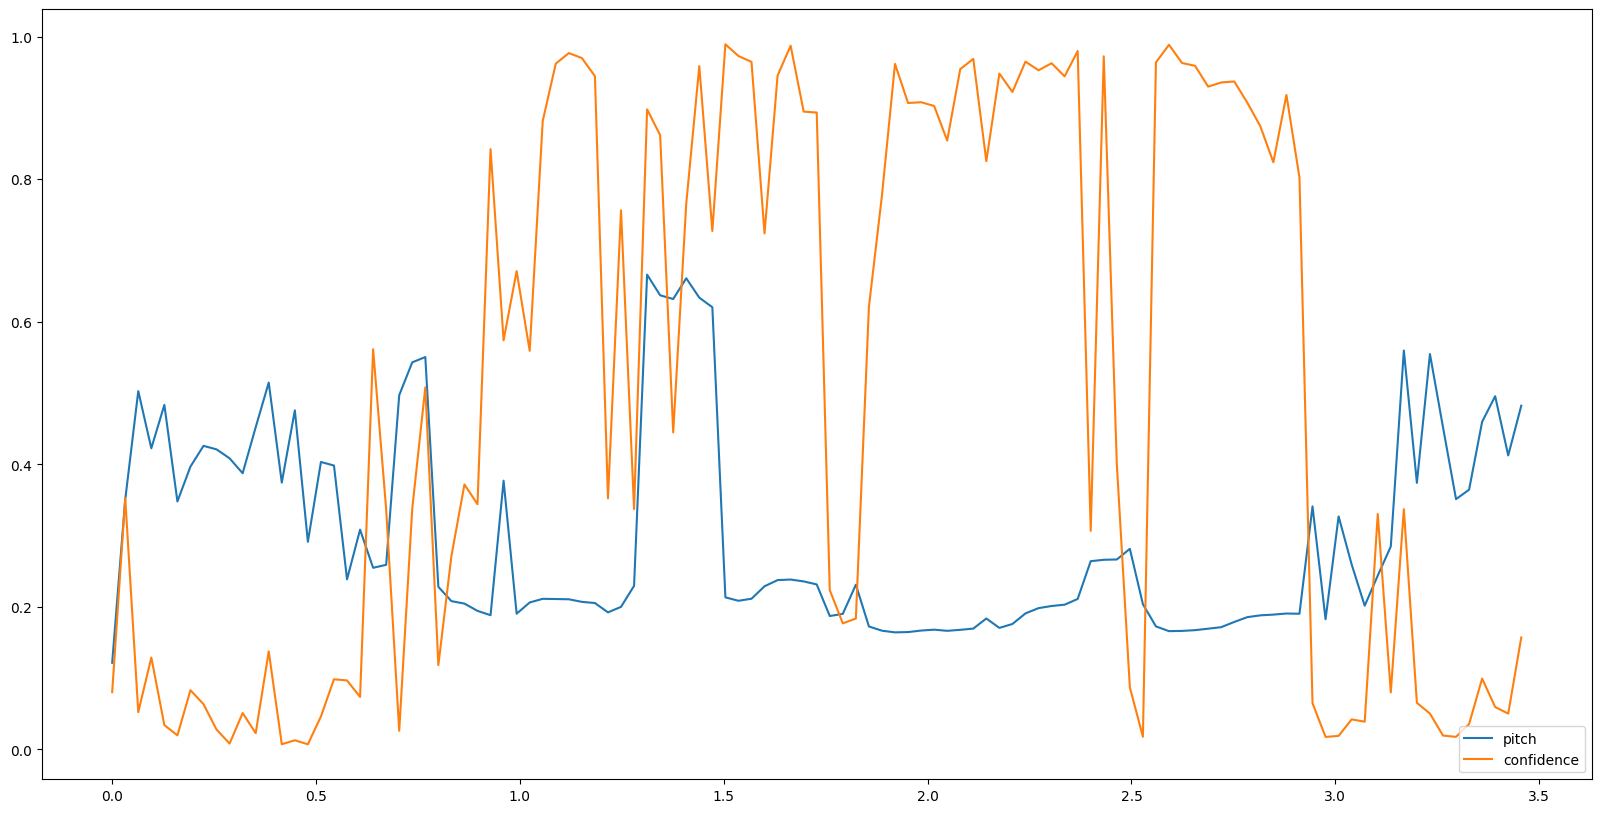

In [11]:
import matplotlib.pyplot as plt

print(f"sample_rate: {sample_rate}")

# We now feed the audio to the SPICE tf.hub model to obtain pitch and uncertainty outputs as tensors.
model_output = evaluate_pitch(tf.constant(audio_samples, tf.float32))

pitch_outputs = model_output["pitch"]
uncertainty_outputs = model_output["uncertainty"]
confidence_outputs = 1.0 - uncertainty_outputs

print(f"len(audio_samples): {len(audio_samples)}")
print(f"len(pitch_outputs): {len(pitch_outputs)}")
print(f"len(confidence_outputs): {len(confidence_outputs)}")

duration = len(audio_samples) / sample_rate
print(f"duration: {duration}")

ratio = len(audio_samples) / len(pitch_outputs)
print(f"actual ration: {ratio}")

# https://tfhub.dev/google/spice/2
SAMPLE_RATE = 16000
PITCH_TO_SAMPLES_RATIO = 512
ratio_offset = SAMPLE_RATE / PITCH_TO_SAMPLES_RATIO / 2 / 1000
print(f"ratio_offset: {ratio_offset}")

time_offset = PITCH_TO_SAMPLES_RATIO / SAMPLE_RATE
print(f"time_offset: {time_offset}")

pitch_outputs_list = [float(x) for x in pitch_outputs]
# print(f"pitch_outputs: {pitch_outputs}")
# print(f"pitch_outputs_list: {pitch_outputs_list}")
confidence_outputs = 1.0 - uncertainty_outputs
# confidence_outputs_list = list(confidence_outputs)
confidence_outputs_list = [float(x) for x in confidence_outputs]

original_time_stamps = [i * time_offset for i in range(len(pitch_outputs_list))]
print(f"original_time_stamps: {original_time_stamps}")
print(f"len(original_time_stamps): {len(original_time_stamps)}")


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.plot(original_time_stamps, pitch_outputs, label='pitch')
plt.plot(original_time_stamps, confidence_outputs, label='confidence')
plt.legend(loc="lower right")
# plt.show()

pitch_levels = [
    {
        "time": i * time_offset + ratio_offset,
        "confidence": c,
        "pitch": p,
        "semitone": 25.58 + 63.07 * p
    }
    for i, p, c in zip(range(len(pitch_outputs_list)), pitch_outputs_list, confidence_outputs_list)
]
print(f"pitch_levels: {pitch_levels}")


# filter out ponts with low confidence
# CONFIDENCE_THRESHOLD = 0.3

# confident_pitch_outputs = [(i, p)
#                             for i, p, c in zip(range(len(pitch_outputs_list)), pitch_outputs_list, confidence_outputs_list) if c >= CONFIDENCE_THRESHOLD]

# semitones = 25.58 + 63.07 * pitch

# filtered_pitch_levels = [
#     {
#         "time": i * time_offset,
#         "pitch": p,
#         "semitone": 25.58 + 63.07 * p
#     }
#     for i, p in confident_pitch_outputs
# ]
# print(f"filtered_pitch_levels: {filtered_pitch_levels}")

# # for p in pitch_levels:
# #     print(f"! time: {p['time']}, pitch: {p['pitch']}")

# filtered_time_stamps = [p["time"] for p in filtered_pitch_levels]
# filtered_pitch_outputs = [p["pitch"] for p in filtered_pitch_levels]

# plt.plot(filtered_time_stamps, filtered_pitch_outputs, label='pitch', linewidth=3)
# plt.legend(loc="lower right")

plt.show()



In [1]:
%load_ext autoreload
%autoreload all

from pydub import AudioSegment
from model.code.inference import handler
import sagemaker
import json
import secrets


# model_dir = "model"
# print(model_dir)

# model = model_fn(model_dir)

ogg_audio = '../../data/hello-hello.ogg'

with open(ogg_audio, 'rb') as f:
    audio_data = f.read()
print(audio_data)

class Struct(dict):
    def __getattr__(self, name):
        try:
            return self[name]
        except KeyError:
            raise AttributeError(name)

    def __setattr__(self, name, value):
        self[name] = value

    def copy(self):
        return Struct(dict.copy(self))

context = Struct(request_content_type="audio/ogg",rest_uri="http://localhost:8501/v1/models/pitcheval:predict",accept_header="application/json")
print(f"context: {context}")
print(f"context.request_content_type: {context.request_content_type}")

pitch_levels = handler(audio_data, context)
print('pitch_levels: ', pitch_levels)

# output_data = output_fn(words, "application/json")
# print('output_data: ', words)

# output = json.dumps(words)
# print('output: ', output)


2023-03-12 04:05:59.205071: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 04:05:59.298844: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B\xf2\x81\x04B\xf3\x81\x08B\x82\x84webmB\x87\x81\x04B\x85\x81\x02\x18S\x80g\x01\xff\xff\xff\xff\xff\xff\xff\x15I\xa9f\x99*\xd7\xb1\x83\x0fB@M\x80\x86ChromeWA\x86Chrome\x16T\xaek\xbf\xae\xbd\xd7\x81\x01s\xc5\x87\x9f\xe0\xe1\xf3S\xec\x8a\x83\x81\x02\x86\x86A_OPUSc\xa2\x93OpusHead\x01\x02\x00\x00\x80\xbb\x00\x00\x00\x00\x00\xe1\x8d\xb5\x84G;\x80\x00\x9f\x81\x02bd\x81 \x1fC\xb6u\x01\xff\xff\xff\xff\xff\xff\xff\xe7\x81\x00\xa3A\x9b\x81\x00\x00\x80\xff\x83\x02\x02\xff\xfe\xff\xfev\xc2\xf5MEe\xed\xf8Bo\xee\x99\xd8b\x83a\xaa\x96\xeb\x93\x7f\x15\xff\x8a\x0cE\x9ffT\x95\x89\xa5\xda\'\x91\x14\x12\xffb(\x1b\xc4A\x08\xdb\x16\xf0\xc3p\xd7\x817\x081\xcd\xeb\x08\x86?\xdf\x17.\xe7\xd9\x81\xff\x86\x9cA\x12\xe4\xd0\xa4\xb6\xd0M\xbc\x12\xda\xe8\xf9+\xa7\xbf\xc05\xa6<PcU\x16A\x8b\x90\xbf\x10lE\xf8]i\xb8\x1f\x7fi\xa9a"\x95\x90@&\x9a\x86\xb0\xe9D\xe8\xa0\xbd\xabj>\xea\xde\x13\xc9M\xb5\x13\xba7\xb8wy\xa5G\xe4,P\xe2\xcb\xc8\xc3\xfd\x05\xd1\x88\x1b\x1f{\x0f\x92l>\xb5\

In [13]:
predictions = [
    {
        "uncertainty": 0.919730067,
        "pitch": 0.12154416
    },
    {
        "uncertainty": 0.647250772,
        "pitch": 0.350472808
    }
]

pitch_levels = [
    {
        "time": i,
        "confidence": 1.0 - predictions[i]["uncertainty"],
        "pitch": predictions[i]["pitch"],
        # "semitone": calculate_semitone(p["pitch"])
    }
    for i in range(len(predictions))
]

# pitch_levels = [
#     {
#         "time": i,
#         "confidence": 1.0 - p["uncertainty"],
#         "pitch": p["pitch"],
#         # "semitone": calculate_semitone(p["pitch"])
#     }
#     for i, p in zip(range(len(predictions)), predictions)
# ]
# print(f"pitch_levels: {pitch_levels}")


pitch_levels: [{'time': 0, 'confidence': 0.08026993299999996, 'pitch': 0.12154416}, {'time': 1, 'confidence': 0.35274922799999997, 'pitch': 0.350472808}]


In [2]:
import sagemaker
%load_ext autoreload
%autoreload all

sess = sagemaker.Session()
# sagemaker session bucket -> used for uploading data, models and logs
# sagemaker will automatically create this bucket if it not exists
sagemaker_session_bucket = None
if sagemaker_session_bucket is None and sess is not None:
    # set to default bucket if a bucket name is not given
    sagemaker_session_bucket = sess.default_bucket()

# try:
#     role = sagemaker.get_execution_role()
# except ValueError:
#     iam = boto3.client('iam')
#     role = iam.get_role(RoleName='sagemaker_execution_role')['Role']['Arn']

role = "arn:aws:iam::908060038426:role/sagemaker-local-role"

sess = sagemaker.Session(default_bucket=sagemaker_session_bucket)

print(f"sagemaker role arn: {role}")
print(f"sagemaker bucket: {sess.default_bucket()}")
print(f"sagemaker session region: {sess.boto_region_name}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
sagemaker role arn: arn:aws:iam::908060038426:role/sagemaker-local-role
sagemaker bucket: sagemaker-us-east-1-908060038426
sagemaker session region: us-east-1


In [3]:
model_s3_path = sess.upload_data(
    path="build/pitcheval.tar.gz", bucket=sess.default_bucket(), key_prefix="model/voicematch"
)
print(f"model_s3_path: {model_s3_path}")

model_s3_path: s3://sagemaker-us-east-1-908060038426/model/voicematch/pitcheval.tar.gz


In [8]:
from sagemaker.tensorflow import TensorFlowModel
from sagemaker.serializers import IdentitySerializer
from sagemaker.deserializers import StreamDeserializer
%load_ext autoreload
%autoreload all


# from sagemaker.huggingface.model import HuggingFaceModel
# from sagemaker.pytorch import PyTorchModel
# from src.predictor import PlainPyTorchPredictor


# print(f"model_s3_path: {model_s3_path}")
role = "arn:aws:iam::908060038426:role/sagemaker-local-role"
model_s3_path = "s3://sagemaker-us-east-1-908060038426/model/voicematch/pitcheval.tar.gz"

# model = PyTorchModel(
#     entry_point="inference.py",
#     source_dir="model/code",
#     role=role,
#     model_data=model_s3_path,
#     model_server_workers=4,
#     image_uri='voicematch-phonerecog:latest',
#     # predictor_cls=PlainPyTorchPredictor
# )

model = TensorFlowModel(
    entry_point='inference.py',
    source_dir="model/code",
    model_data=model_s3_path,
    role=role,
    # image_uri='voicematch-pitcheval:latest',
    framework_version='2.11.0',
    # container_log_level='DEBUG',
)

# !docker rm $(docker stop $(docker ps -aq --filter ancestor=voicematch-wordrecog:latest --format="{{.ID}}"))
# predictor.delete_endpoint()

predictor = model.deploy(
    initial_instance_count=1,
    instance_type="local",
    serializer=IdentitySerializer(),
    deserializer=StreamDeserializer(),
    # wait=False,
)
print(f"predictor: {predictor}")
print(f"predictor.endpoint_name: {predictor.endpoint_name}")


update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Login Succeeded
Attaching to jkbpm3t6hh-algo-1-kxb6a
jkbpm3t6hh-algo-1-kxb6a | INFO:__main__:PYTHON SERVICE: True
jkbpm3t6hh-algo-1-kxb6a | INFO:__main__:starting services
jkbpm3t6hh-algo-1-kxb6a | Traceback (most recent call last):
jkbpm3t6hh-algo-1-kxb6a |   File "/sagemaker/serve.py", line 502, in <module>
jkbpm3t6hh-algo-1-kxb6a |     ServiceManager().start()
jkbpm3t6hh-algo-1-kxb6a |   File "/sagemaker/serve.py", line 482, in start
jkbpm3t6hh-algo-1-kxb6a |     self._create_tfs_config()
jkbpm3t6hh-algo-1-kxb6a |   File "/sagemaker/serve.py", line 153, in _create_tfs_config
jkbpm3t6hh-algo-1-kxb6a |     raise ValueError("no SavedModel bundles found!")
jkbpm3t6hh-algo-1-kxb6a | ValueError: no SavedModel bundles found!


Exception in thread Thread-7:
Traceback (most recent call last):
  File "/root/miniconda3/envs/pytorch-tf/lib/python3.10/site-packages/sagemaker/local/image.py", line 854, in run
    _stream_output(self.process)
  File "/root/miniconda3/envs/pytorch-tf/lib/python3.10/site-packages/sagemaker/local/image.py", line 916, in _stream_output
    raise RuntimeError("Process exited with code: %s" % exit_code)
RuntimeError: Process exited with code: 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/root/miniconda3/envs/pytorch-tf/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/root/miniconda3/envs/pytorch-tf/lib/python3.10/site-packages/sagemaker/local/image.py", line 859, in run
    raise RuntimeError(msg)
RuntimeError: Failed to run: ['docker-compose', '-f', '/tmp/tmpcmsvazmv/docker-compose.yaml', 'up', '--build', '--abort-on-container-exit'], Process exited with code: 1


jkbpm3t6hh-algo-1-kxb6a exited with code 1
Aborting on container exit...


KeyboardInterrupt: 

In [13]:
from datasets import Audio, Dataset, interleave_datasets
from pydub import AudioSegment

print(predictor)

ogg_audio = '../../data/hello-hello.ogg'
with open(ogg_audio, 'rb') as f:
    audio_data = f.read()

# res = predictor.predict(audio_data, initial_args={
#     "ContentType": "audio/ogg",
# })
# predictor.content_type = "audio/ogg"
result = predictor.predict(audio_data)

print('len: ', len(result))
if len(result) > 0:
    print(f"result[0]: {result[0]}")
if len(result) > 1:
    print(f"result[1]: {result[1]}")

if len(result) > 0:
    response = result[0]
    status = response.status
    content_type = response.headers['Content-Type']
    data = response.read()

    print(f"status: {status}")
    print(f"content_type: {content_type}")
    print(f"data: {data}")


wbs0vskpmy-algo-1-5m0wn | 2023-03-09T05:02:51,178 [INFO ] W-9000-model_1.0 org.pytorch.serve.wlm.WorkerThread - Flushing req. to backend at: 1678338171178
wbs0vskpmy-algo-1-5m0wn | 2023-03-09T05:02:51,180 [INFO ] W-9000-model_1.0-stdout MODEL_LOG - running model_fn
wbs0vskpmy-algo-1-5m0wn | 2023-03-09T05:02:51,180 [INFO ] W-9000-model_1.0-stdout MODEL_LOG - Backend received inference at: 1678338171
wbs0vskpmy-algo-1-5m0wn | 2023-03-09T05:02:55,339 [WARN ] W-9000-model_1.0-stderr MODEL_LOG - It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
wbs0vskpmy-algo-1-5m0wn | 2023-03-09T05:02:55,643 [INFO ] W-9000-model_1.0-stdout MODEL_LOG - running input_fn, content_type: application/octet-stream
wbs0vskpmy-algo-1-5m0wn | 2023-03-09T05:02:55,643 [INFO ] W-9000-model_1.0-stdout MODEL_LOG - ogg_file: /tmp/vm-1286b1fc44ff2d9a0609f0edc1da18b9d629943b4563e5ff.ogg
wbs0vskpmy-algo-1-5m0wn | 2023

In [11]:
# delete endpoint
predictor.delete_endpoint()


Gracefully stopping... (press Ctrl+C again to force)
